In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
# ---------- Load and Clean ----------
def load_and_clean(path):
    df = pd.read_csv(path)
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df.dropna()

# Load datasets
benign = pd.concat([
    load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/Benign.csv"),
    load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/Benign1.csv"),
    load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/Benign2.csv"),
    load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/Benign3.csv")
], ignore_index=True)

# Attack datasets
sqlInj = load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/SqlInjection.csv")
uploading = load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/Uploading_Attack.csv")
portscan = load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/Recon-PortScan.csv")
Backdoor_Malware = load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/Backdoor_Malware.csv")
BrowserHijacking = load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/BrowserHijacking.csv")
DDoS_SlowLoris = load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/DDoS-SlowLoris.csv")
DNS_Spoofing = load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/DNS_Spoofing.csv")
Recon_OSScan = load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/Recon-OSScan.csv")
VulnerabilityScan = load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/VulnerabilityScan.csv")
XSS = load_and_clean("/home/user/ml_Mastery/GitHub-WS/Hybrid (unsupervised with supervised) NIDS/DS/XSS.csv")



In [4]:
# ---------- Feature Alignment ----------
common_cols = list(set(benign.columns) & set(uploading.columns) & set(sqlInj.columns) & set(portscan.columns) &  
                    set(Backdoor_Malware.columns) & set(BrowserHijacking.columns) & set(DDoS_SlowLoris.columns) &  
                    set(Recon_OSScan.columns) & set(VulnerabilityScan.columns) & set(XSS.columns))
if "Label" in common_cols:
    common_cols.remove("Label")

# Get only aligned features
X_benign = benign[common_cols]
X_upload = uploading[common_cols]
X_sqlInj = sqlInj[common_cols]
X_portscan = portscan[common_cols]
X_Backdoor_Malware = Backdoor_Malware[common_cols]
X_BrowserHijacking = BrowserHijacking[common_cols]
X_DDoS_SlowLoris = DDoS_SlowLoris[common_cols]
X_DNS_Spoofing = DNS_Spoofing[common_cols]
X_Recon_OSScan = Recon_OSScan[common_cols] 
X_VulnerabilityScan = VulnerabilityScan[common_cols].clip(-1e10, 1e10).replace([np.inf, -np.inf], np.nan).dropna()
X_XSS = XSS[common_cols]

In [5]:

# ---------- Scaling ----------
scaler = StandardScaler()
X_all = np.vstack([
    X_benign, X_upload, X_sqlInj, X_portscan,
    X_Backdoor_Malware, X_BrowserHijacking, X_DDoS_SlowLoris,
    X_DNS_Spoofing, X_Recon_OSScan, X_VulnerabilityScan, X_XSS
])
X_all_scaled = scaler.fit_transform(X_all)


In [6]:
# ---------- Label Construction ----------
y_all = np.array(
    [0] * len(X_benign) +
    [1] * len(X_upload) +
    [2] * len(X_sqlInj) +
    [3] * len(X_portscan) +
    [4] * len(X_Backdoor_Malware) +
    [5] * len(X_BrowserHijacking) +
    [6] * len(X_DDoS_SlowLoris) +
    [7] * len(X_DNS_Spoofing) +
    [8] * len(X_Recon_OSScan) +
    [9] * len(X_VulnerabilityScan) +
    [10] * len(X_XSS)
)


In [7]:
import numpy as np

print("Any NaNs?:", np.isnan(X_all_scaled).any())
print("Total NaNs:", np.isnan(X_all_scaled).sum())

Any NaNs?: False
Total NaNs: 0


In [8]:
# ---------- Train-Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y_all, test_size=0.2, random_state=42)

Epoch 1, Loss: 0.7055, F1: 0.6118, Acc: 0.5350
Saved best model at epoch 1 with F1: 0.6118
Epoch 2, Loss: 0.4813, F1: 0.6379, Acc: 0.5737
Saved best model at epoch 2 with F1: 0.6379
Epoch 3, Loss: 0.4372, F1: 0.6556, Acc: 0.5971
Saved best model at epoch 3 with F1: 0.6556
Epoch 4, Loss: 0.4134, F1: 0.6485, Acc: 0.5837
Epoch 5, Loss: 0.3989, F1: 0.6480, Acc: 0.5913
Epoch 6, Loss: 0.3892, F1: 0.6557, Acc: 0.5997
Saved best model at epoch 6 with F1: 0.6557
Epoch 7, Loss: 0.3817, F1: 0.6501, Acc: 0.5913
Epoch 8, Loss: 0.3749, F1: 0.6685, Acc: 0.6176
Saved best model at epoch 8 with F1: 0.6685
Epoch 9, Loss: 0.3688, F1: 0.6695, Acc: 0.6215
Saved best model at epoch 9 with F1: 0.6695
Epoch 10, Loss: 0.3634, F1: 0.6657, Acc: 0.6189
Epoch 11, Loss: 0.3587, F1: 0.6603, Acc: 0.6103
Epoch 12, Loss: 0.3545, F1: 0.6655, Acc: 0.6164
Epoch 13, Loss: 0.3503, F1: 0.6737, Acc: 0.6276
Saved best model at epoch 13 with F1: 0.6737
Epoch 14, Loss: 0.3472, F1: 0.6636, Acc: 0.6152
Epoch 15, Loss: 0.3437, F1: 

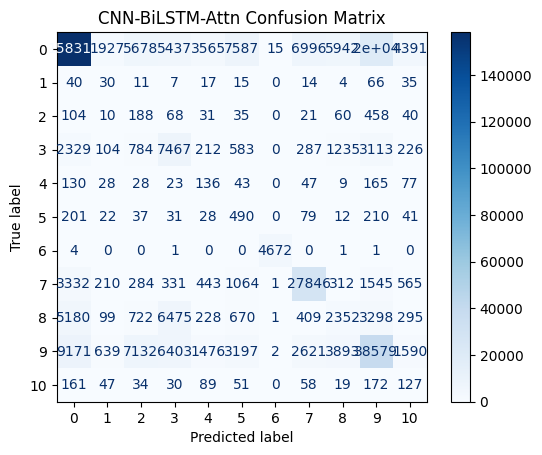

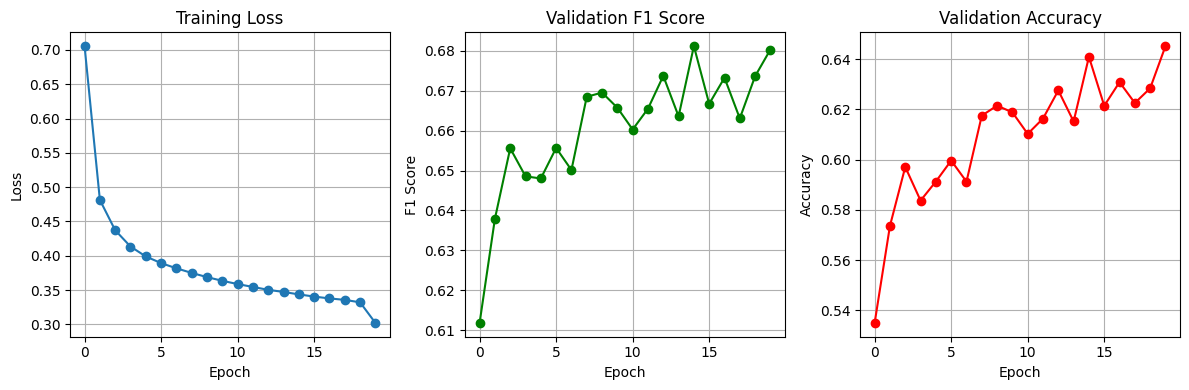

TorchScript model saved.


In [10]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight


#  Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y_all, test_size=0.2, random_state=42)

#  Oversample Training Data 
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Convert to Tensors and reshape for CNN + BiLSTM
X_res_tensor = torch.tensor(X_resampled, dtype=torch.float32).unsqueeze(1)  # shape: [batch, channels=1, features]
y_res_tensor = torch.tensor(y_resampled, dtype=torch.long)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to('cuda' if torch.cuda.is_available() else 'cpu')

# Create DataLoader
dataset = TensorDataset(X_res_tensor, y_res_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Focal Loss 
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, weight=None):
        super().__init__()
        self.gamma = gamma
        self.weight = weight

    def forward(self, input, target):
        log_prob = nn.functional.log_softmax(input, dim=1)
        prob = torch.exp(log_prob)
        focal_term = (1 - prob).pow(self.gamma)
        return nn.functional.nll_loss(focal_term * log_prob, target, weight=self.weight)

#  CNN + BiLSTM + Attention 
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.attn = nn.Linear(hidden_dim, 1)

    def forward(self, lstm_out):
        weights = torch.softmax(self.attn(lstm_out), dim=1)  # [batch, seq_len, 1]
        context = torch.sum(weights * lstm_out, dim=1)       # [batch, hidden_dim]
        return context

class CNNBiLSTMAttention(nn.Module):
    def __init__(self, input_features, num_classes, dropout_rate=0.3):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(dropout_rate)  # Dropout after CNN
        )

        self.bilstm = nn.LSTM(
            input_size=64, 
            hidden_size=128,         # Increased hidden size
            num_layers=2,            # Stacked BiLSTM
            batch_first=True, 
            bidirectional=True, 
            dropout=dropout_rate     # Dropout between LSTM layers
        )

        self.attention = Attention(hidden_dim=256)  # 128 * 2 (bidirectional)
        
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),  # Optional dropout before final layer
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.cnn(x)             # [batch, 64, features]
        x = x.permute(0, 2, 1)      # [batch, features, 64] → [batch, seq_len, feature]
        lstm_out, _ = self.bilstm(x)
        attn_out = self.attention(lstm_out)
        return attn_out, self.classifier(attn_out)

# Training Setup 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNBiLSTMAttention(input_features=X_res_tensor.shape[2], num_classes=len(np.unique(y_resampled))).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = FocalLoss(weight=class_weights_tensor)

train_losses, val_f1_scores, val_accuracies = [], [], []
best_f1, best_model_path = 0.0, "best_cnn_bilstm_attn.pth"
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)
early_stop_patience, early_stop_counter = 5, 0

for epoch in range(1, 21):
    model.train()
    total_loss = 0
    for xb, yb in dataloader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        _, logits = model(xb)
        loss = loss_fn(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(dataloader))

    model.eval()
    with torch.no_grad():
        val_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32))
        val_loader = DataLoader(val_dataset, batch_size=512)  # or 256 if still tight

        val_logits = []
        with torch.no_grad():
            for batch in val_loader:
                xb = batch[0].unsqueeze(1).to(device)
                _, out = model(xb)
                val_logits.append(out.cpu())

        val_logits = torch.cat(val_logits, dim=0)



        val_preds = torch.argmax(val_logits, dim=1).cpu().numpy()
        val_f1 = f1_score(y_test, val_preds, average='weighted')
        val_acc = accuracy_score(y_test, val_preds)
        val_f1_scores.append(val_f1)
        val_accuracies.append(val_acc)

    scheduler.step(val_f1)
    print(f"Epoch {epoch}, Loss: {train_losses[-1]:.4f}, F1: {val_f1:.4f}, Acc: {val_acc:.4f}")

    if val_f1 > best_f1:
        best_f1 = val_f1
        torch.save(model.state_dict(), best_model_path)
        print(f"Saved best model at epoch {epoch} with F1: {val_f1:.4f}")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= early_stop_patience:
            print(" Early stopping triggered.")
            break

# ---------- Evaluate Best Model ----------
best_model = CNNBiLSTMAttention(
    input_features=X_res_tensor.shape[2], 
    num_classes=len(np.unique(y_resampled))
)

best_model.load_state_dict(torch.load(best_model_path))
best_model.to(device)
best_model.eval()

# Wrap test set in DataLoader
X_eval_tensor = torch.tensor(X_test, dtype=torch.float32)
eval_dataset = TensorDataset(X_eval_tensor)
eval_loader = DataLoader(eval_dataset, batch_size=512)

eval_logits = []
with torch.no_grad():
    for batch in eval_loader:
        xb = batch[0].unsqueeze(1).to(device)  # Add channel dimension
        _, out = best_model(xb)
        eval_logits.append(out.cpu())

# Concatenate predictions
eval_logits = torch.cat(eval_logits, dim=0)
eval_preds = torch.argmax(eval_logits, dim=1).numpy()

# Evaluation
print("\n🔍 Evaluation of Best Saved Model:")
print(classification_report(y_test, eval_preds))
cm = confusion_matrix(y_test, eval_preds)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("CNN-BiLSTM-Attn Confusion Matrix")
plt.grid(False)
plt.show()

# ---------- Plot Metrics ----------
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(val_f1_scores, marker='o', color='green')
plt.title("Validation F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(val_accuracies, marker='o', color='red')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()

# ---------- Export TorchScript ----------
example_input = torch.randn(1, 1, X_res_tensor.shape[2]).to(device)
torch.jit.trace(best_model, example_input).save("cnn_bilstm_attn_traced.pt")
print("TorchScript model saved.")
